<a href="https://colab.research.google.com/github/archie46/Computer-Vision-Labarotary/blob/main/CV7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
# Read the video
video_path = 'slow_traffic_small.mp4'
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

In [ ]:
# Create a directory to save the frames
frames_dir = 'frames'
os.makedirs(frames_dir, exist_ok=True)

# Read and save individual frames
frame_count = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame_filename = os.path.join(frames_dir, f"frame_{frame_count:04d}.jpg")
    cv2.imwrite(frame_filename, frame)
    frame_count += 1
Z
cap.release()

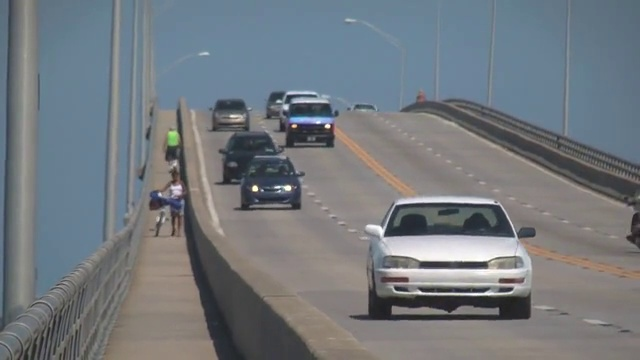

In [ ]:
# After saving the frames, display a specific frame
frame_to_display = 100  # Change this to the desired frame number
frame_filename = os.path.join(frames_dir, f"frame_{frame_to_display:04d}.jpg")
frame = cv2.imread(frame_filename)
if frame is not None:
    cv2_imshow(frame)
else:
    print("Error: Could not read the frame.")

In [ ]:
# Convert individual frames back to video
output_video_path = 'output_video.avi'  # Change the codec and extension as needed
frame_files = [os.path.join(frames_dir, f) for f in os.listdir(frames_dir)]
frame_files.sort()  # Ensure frames are in the correct order

fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Change the codec as needed
frame = cv2.imread(frame_files[0])
out = cv2.VideoWriter(output_video_path, fourcc, 30.0, (frame.shape[1], frame.shape[0]))

for frame_file in frame_files:
    frame = cv2.imread(frame_file)
    out.write(frame)

out.release()

# Clean up: Remove the frames directory
for frame_file in frame_files:
    os.remove(frame_file)
os.rmdir(frames_dir)

In [ ]:
print("Available Codecs:")
# Create a dictionary to map codec names to their corresponding FourCC codes
codecs = {
    'XVID': cv2.VideoWriter_fourcc(*'XVID'),
    'MJPG': cv2.VideoWriter_fourcc(*'MJPG'),
    'DIVX': cv2.VideoWriter_fourcc(*'DIVX'),
    'MP4V': cv2.VideoWriter_fourcc(*'MP4V')
}

# Display the FourCC codes for each codec
for codec_name, fourcc_code in codecs.items():
    print(f"Codec: {codec_name}, FourCC: {fourcc_code.to_bytes(4, 'little')}")

Available Codecs:
Codec: XVID, FourCC: b'XVID'
Codec: MJPG, FourCC: b'MJPG'
Codec: DIVX, FourCC: b'DIVX'
Codec: MP4V, FourCC: b'MP4V'


In [ ]:
# List of codecs to test
codecs = {
    'XVID': cv2.VideoWriter_fourcc(*'XVID'),
    'MJPG': cv2.VideoWriter_fourcc(*'MJPG'),
    'DIVX': cv2.VideoWriter_fourcc(*'DIVX'),
    'MP4V': cv2.VideoWriter_fourcc(*'MP4V')
}

input_video_path = video_path  # Change this to your video file
output_dir = 'output_videos'
os.makedirs(output_dir, exist_ok=True)

# Encode the video using different codecs and compare file size and quality
for codec_name, codec_fourcc in codecs.items():
    output_video_path = os.path.join(output_dir, f'output_{codec_name}.mp4')
    cap = cv2.VideoCapture(input_video_path)
    if not cap.isOpened():
        print("Error: Could not open video.")

    ret, frame = cap.read()
    if not ret:
        print("Error: Could not read the first frame.")
        cap.release()

    out = cv2.VideoWriter(output_video_path, codec_fourcc, 30.0, (frame.shape[1], frame.shape[0]))

    while True:
        out.write(frame)
        ret, frame = cap.read()
        if not ret:
            break

    cap.release()
    out.release()

    # Get file size in bytes
    try:
      file_size = os.path.getsize(output_video_path)
      print(f"Codec: {codec_name}, File Size: {file_size / (1024 * 1024):.2f} MB")
    except:
      print(f"Codec: {codec_name}, File Size: Not Available ")

# Clean up: Remove the output directory
for codec_name in codecs.keys():
    output_video_path = os.path.join(output_dir, f'output_{codec_name}.mp4')
    os.remove(output_video_path)
os.rmdir(output_dir)

Codec: XVID, File Size: 4.34 MB
Codec: MJPG, File Size: 18.12 MB
Codec: DIVX, File Size: 4.34 MB
Codec: MP4V, File Size: 4.34 MB
